In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(train_input.shape, train_target.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]))

218


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

In [9]:
lengths = np.array([len(x) for x in train_input])

In [10]:
print(np.mean(lengths), np.std(lengths))

239.00925 176.67367592382715


In [11]:
import matplotlib.pyplot as plt

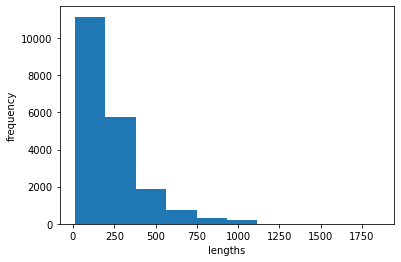

In [12]:
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
train_seq = pad_sequences(train_input, maxlen=100)

In [15]:
print(train_seq.shape)

(20000, 100)


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

In [17]:
from tensorflow import keras

In [18]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

(20000, 100, 500)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [23]:
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=100,
                    validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 18s 76ms/step - loss: 0.7024 - accuracy: 0.5002 - val_loss: 0.6985 - val_accuracy: 0.5106
Epoch 2/100
200/200 [==============================] - 15s 74ms/step - loss: 0.6990 - accuracy: 0.5059 - val_loss: 0.6950 - val_accuracy: 0.5174
Epoch 3/100
200/200 [==============================] - 15s 73ms/step - loss: 0.6937 - accuracy: 0.5178 - val_loss: 0.6920 - val_accuracy: 0.5292
Epoch 4/100
200/200 [==============================] - 15s 73ms/step - loss: 0.6887 - accuracy: 0.5352 - val_loss: 0.6889 - val_accuracy: 0.5388
Epoch 5/100
200/200 [==============================] - 15s 73ms/step - loss: 0.6856 - accuracy: 0.5458 - val_loss: 0.6853 - val_accuracy: 0.5508
Epoch 6/100
200/200 [==============================] - 15s 73ms/step - loss: 0.6807 - accuracy: 0.5652 - val_loss: 0.6798 - val_accuracy: 0.5736
Epoch 7/100
200/200 [==============================] - 15s 73ms/step - loss: 0.6714 - accuracy: 0.5914 - val_loss: 0.6566 - val_ac

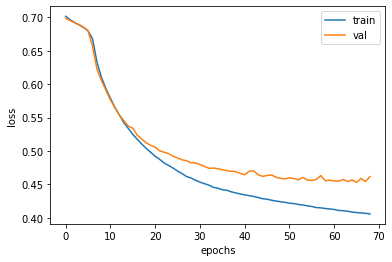

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb2 = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb2 = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, batch_size=100, epochs=100,
           callbacks=[checkpoint_cb2, early_stopping_cb2],
           validation_data=(val_seq, val_target))

Epoch 1/100
200/200 [==============================] - 15s 70ms/step - loss: 0.6771 - accuracy: 0.5838 - val_loss: 0.6676 - val_accuracy: 0.6140
Epoch 2/100
200/200 [==============================] - 14s 70ms/step - loss: 0.6483 - accuracy: 0.6530 - val_loss: 0.6107 - val_accuracy: 0.7094
Epoch 3/100
200/200 [==============================] - 14s 69ms/step - loss: 0.5967 - accuracy: 0.7222 - val_loss: 0.5890 - val_accuracy: 0.7188
Epoch 4/100
200/200 [==============================] - 14s 69ms/step - loss: 0.5740 - accuracy: 0.7371 - val_loss: 0.5705 - val_accuracy: 0.7280
Epoch 5/100
200/200 [==============================] - 14s 69ms/step - loss: 0.5572 - accuracy: 0.7439 - val_loss: 0.5550 - val_accuracy: 0.7414
Epoch 6/100
200/200 [==============================] - 14s 69ms/step - loss: 0.5393 - accuracy: 0.7583 - val_loss: 0.5449 - val_accuracy: 0.7464
Epoch 7/100
200/200 [==============================] - 14s 69ms/step - loss: 0.5266 - accuracy: 0.7663 - val_loss: 0.5372 - val_ac

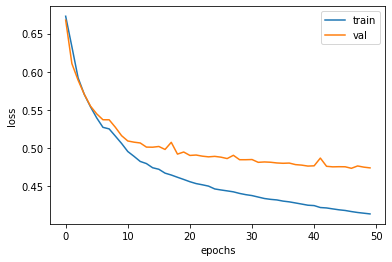

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()